### Historical data 

In [1]:
import requests
import datetime
import pandas as pd
import time

API_KEY = '38520c64996c42a38b975f1a16022190'

LAT = 24.8607
LON = 67.0011

MONTHS = range(1, 10)  
YEAR = 2025
AQI_URL = "https://api.weatherbit.io/v2.0/history/airquality"
WEATHER_URL = "https://api.weatherbit.io/v2.0/history/hourly"

all_data = []
def month_date_ranges(year, month):
    start = datetime.date(year, month, 1)
    if month == 12:
        end = datetime.date(year + 1, 1, 1)
    else:
        end = datetime.date(year, month + 1, 1)
    return start, end

for month in MONTHS:
    start_date, end_date = month_date_ranges(YEAR, month)

    start_str = start_date.strftime('%Y-%m-%d')
    end_str = end_date.strftime('%Y-%m-%d')

    print(f"Fetching data for {start_str} to {end_str}...")
    aqi_params = {
        'lat': LAT,
        'lon': LON,
        'start_date': start_str,
        'end_date': end_str,
        'key': API_KEY
    }
    aqi_response = requests.get(AQI_URL, params=aqi_params)
    aqi_data = aqi_response.json().get('data', [])
    weather_params = {
        'lat': LAT,
        'lon': LON,
        'start_date': start_str,
        'end_date': end_str,
        'key': API_KEY
    }
    weather_response = requests.get(WEATHER_URL, params=weather_params)
    weather_data = weather_response.json().get('data', [])
    aqi_dict = {entry['timestamp_local']: entry for entry in aqi_data}
    weather_dict = {entry['timestamp_local']: entry for entry in weather_data}
    common_timestamps = set(aqi_dict.keys()) & set(weather_dict.keys())
    for ts in sorted(common_timestamps):
        combined = {
            'timestamp': ts,
            'aqi': aqi_dict[ts].get('aqi'),
            'pm25': aqi_dict[ts].get('pm25'),
            'pm10': aqi_dict[ts].get('pm10'),
            'no2': aqi_dict[ts].get('no2'),
            'o3': aqi_dict[ts].get('o3'),
            'temperature': weather_dict[ts].get('temp'),
            'humidity': weather_dict[ts].get('rh'),
            'wind_speed': weather_dict[ts].get('wind_spd'),
            'weather_description': weather_dict[ts].get('weather', {}).get('description')
        }
        all_data.append(combined)
    time.sleep(1)
df = pd.DataFrame(all_data)
print(df.head())
df.to_csv('karachi_coords_aqi_weather_Jan_Sep_2025.csv', index=False)
print("Data saved to karachi_coords_aqi_weather_Jan_Sep_2025.csv")


Fetching data for 2025-01-01 to 2025-02-01...
Fetching data for 2025-02-01 to 2025-03-01...
Fetching data for 2025-03-01 to 2025-04-01...
Fetching data for 2025-04-01 to 2025-05-01...
Fetching data for 2025-05-01 to 2025-06-01...
Fetching data for 2025-06-01 to 2025-07-01...
Fetching data for 2025-07-01 to 2025-08-01...
Fetching data for 2025-08-01 to 2025-09-01...
Fetching data for 2025-09-01 to 2025-10-01...
             timestamp  aqi   pm25  pm10  no2    o3  temperature  humidity  \
0  2025-01-01T05:00:00   82  27.00  28.0  2.0  81.0         13.3        56   
1  2025-01-01T06:00:00   88  29.67  31.0  2.7  81.0         13.3        59   
2  2025-01-01T07:00:00   94  32.33  34.0  3.3  81.0         13.7        59   
3  2025-01-01T08:00:00  100  35.00  37.0  4.0  81.0         14.4        58   
4  2025-01-01T09:00:00  104  37.00  39.0  3.7  92.0         15.2        54   

   wind_speed weather_description  
0         4.0       Broken clouds  
1         4.4    Scattered clouds  
2        

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('karachi_coords_aqi_weather_Jan_Sep_2025.csv', parse_dates=['timestamp'])

print(df.head())
print(df.info())


            timestamp  aqi   pm25  pm10  no2    o3  temperature  humidity  \
0 2025-01-01 05:00:00   82  27.00  28.0  2.0  81.0         13.3        56   
1 2025-01-01 06:00:00   88  29.67  31.0  2.7  81.0         13.3        59   
2 2025-01-01 07:00:00   94  32.33  34.0  3.3  81.0         13.7        59   
3 2025-01-01 08:00:00  100  35.00  37.0  4.0  81.0         14.4        58   
4 2025-01-01 09:00:00  104  37.00  39.0  3.7  92.0         15.2        54   

   wind_speed weather_description  
0         4.0       Broken clouds  
1         4.4    Scattered clouds  
2         4.0                Haze  
3         4.0                Haze  
4         4.4                Haze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            6516 non-null   datetime64[ns]
 1   aqi                  6516 non-null   i

In [3]:
df.isnull().sum()

timestamp              0
aqi                    0
pm25                   0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
wind_speed             0
weather_description    0
dtype: int64

In [4]:
df.describe()

,timestamp,aqi,pm25,pm10,no2,o3,temperature,humidity,wind_speed
count,6516,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000
mean,2025-05-17 14:34:25.193369856,94.496470,35.349908,67.516805,8.259929,77.135160,27.574095,68.221608,4.664702
min,2025-01-01 05:00:00,32.000000,4.000000,4.000000,1.000000,11.000000,8.100000,5.000000,0.000000
25%,2025-03-10 09:45:00,69.000000,20.000000,39.300000,3.300000,52.000000,25.600000,57.000000,3.200000
50%,2025-05-17 14:30:00,80.000000,25.330000,56.000000,6.300000,70.700000,28.500000,74.000000,4.400000
75%,2025-07-24 19:15:00,98.000000,34.000000,80.700000,10.700000,98.300000,30.400000,84.000000,6.000000
max,2025-10-01 00:00:00,353.000000,353.000000,441.300000,60.000000,183.000000,40.400000,100.000000,11.200000
std,NaN,44.398151,32.913260,46.978304,6.772391,32.422754,5.140989,20.359750,1.870519


In [5]:
print(df['timestamp'].min(), df['timestamp'].max())
print(df['timestamp'].dt.to_period('D').nunique(), "days covered")


2025-01-01 05:00:00 2025-10-01 00:00:00
274 days covered


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


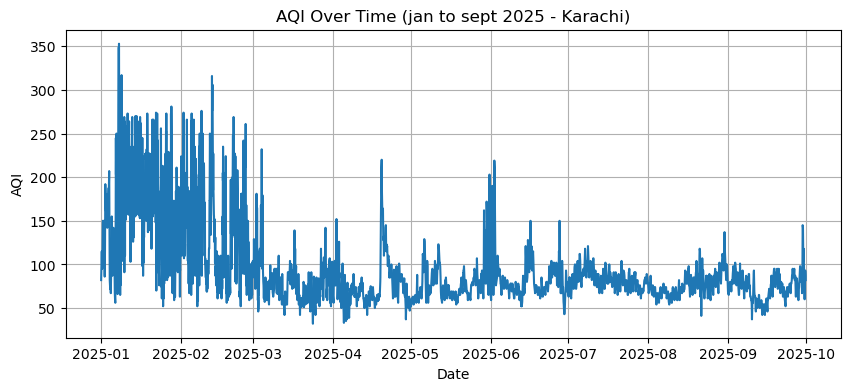

In [7]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='aqi', data=df)
plt.title("AQI Over Time (jan to sept 2025 - Karachi)")
plt.ylabel("AQI")
plt.xlabel("Date")
plt.grid(True)
plt.show()


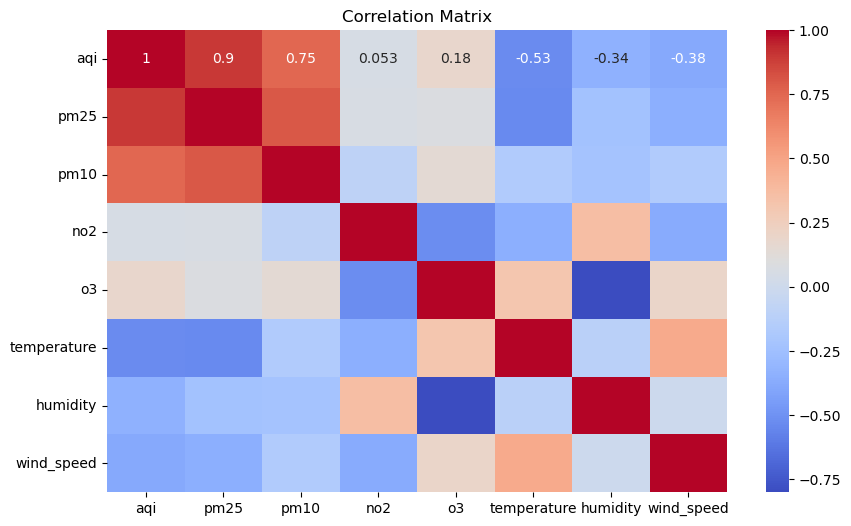

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


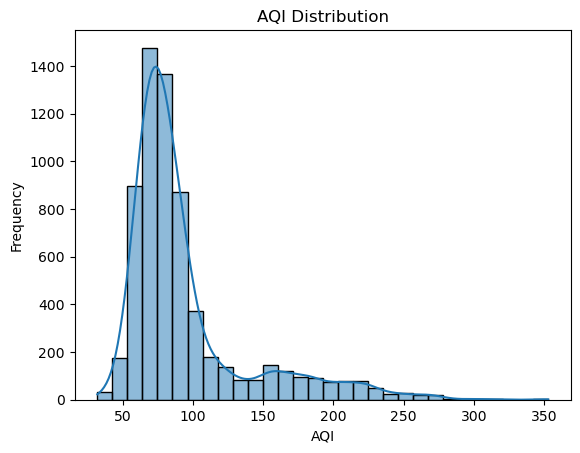

In [9]:
sns.histplot(df['aqi'], kde=True, bins=30)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


In [10]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)


In [11]:
df.head

<bound method NDFrame.head of                timestamp  aqi   pm25  pm10  no2    o3  temperature  humidity  \
0    2025-01-01 05:00:00   82  27.00  28.0  2.0  81.0         13.3        56   
1    2025-01-01 06:00:00   88  29.67  31.0  2.7  81.0         13.3        59   
2    2025-01-01 07:00:00   94  32.33  34.0  3.3  81.0         13.7        59   
3    2025-01-01 08:00:00  100  35.00  37.0  4.0  81.0         14.4        58   
4    2025-01-01 09:00:00  104  37.00  39.0  3.7  92.0         15.2        54   
...                  ...  ...    ...   ...  ...   ...          ...       ...   
6511 2025-09-30 20:00:00   93  32.00  33.0  5.0  83.0         27.8        84   
6512 2025-09-30 21:00:00   91  31.00  31.7  5.0  77.7         27.8        84   
6513 2025-09-30 22:00:00   89  30.00  30.3  5.0  72.3         27.4        86   
6514 2025-09-30 23:00:00   87  29.00  29.0  5.0  67.0         27.4        86   
6515 2025-10-01 00:00:00   82  27.00  27.0  5.3  61.7         27.4        88   

      win

In [12]:
df['aqi_change_rate'] = df['aqi'].diff()

In [13]:
df['pm25_to_pm10_ratio'] = df['pm25'] / df['pm10']


In [14]:
df['temp_change'] = df['temperature'].diff()
df['humidity_change'] = df['humidity'].diff()

In [15]:
df['weather_code'] = df['weather_description'].astype('category').cat.codes


In [17]:
df.head()

,timestamp,aqi,pm25,pm10,no2,o3,temperature,humidity,wind_speed,weather_description,hour,day,month,weekday,is_weekend,aqi_change_rate,pm25_to_pm10_ratio,temp_change,humidity_change,weather_code
0,2025-01-01 05:00:00,82,27.00,28.0,2.0,81.0,13.3,56,4.0,Broken clouds,5,1,1,2,0,NaN,0.964286,NaN,NaN,0
1,2025-01-01 06:00:00,88,29.67,31.0,2.7,81.0,13.3,59,4.4,Scattered clouds,6,1,1,2,0,6.0,0.957097,0.0,3.0,9
2,2025-01-01 07:00:00,94,32.33,34.0,3.3,81.0,13.7,59,4.0,Haze,7,1,1,2,0,6.0,0.950882,0.4,0.0,5
3,2025-01-01 08:00:00,100,35.00,37.0,4.0,81.0,14.4,58,4.0,Haze,8,1,1,2,0,6.0,0.945946,0.7,-1.0,5
4,2025-01-01 09:00:00,104,37.00,39.0,3.7,92.0,15.2,54,4.4,Haze,9,1,1,2,0,4.0,0.948718,0.8,-4.0,5


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


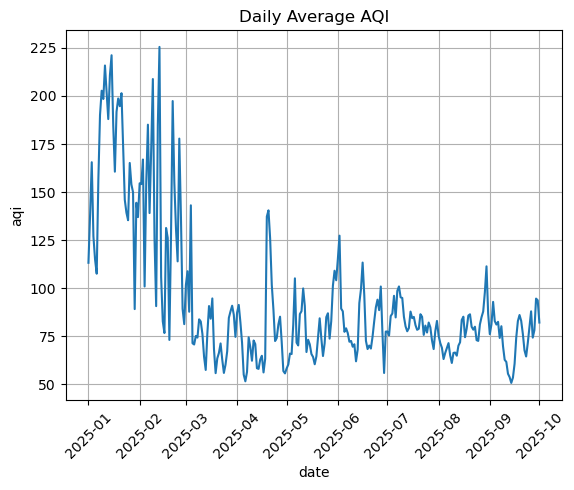

In [18]:
df['date'] = df['timestamp'].dt.date
daily_df = df.groupby('date').agg({
    'aqi': 'mean',
    'pm25': 'mean',
    'pm10': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean'
}).reset_index()

sns.lineplot(x='date', y='aqi', data=daily_df)
plt.title("Daily Average AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
df.isnull().sum()

timestamp              0
aqi                    0
pm25                   0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
wind_speed             0
weather_description    0
hour                   0
day                    0
month                  0
weekday                0
is_weekend             0
aqi_change_rate        1
pm25_to_pm10_ratio     0
temp_change            1
humidity_change        1
weather_code           0
date                   0
dtype: int64

In [22]:
df = df.dropna().reset_index(drop=True)


In [23]:
df.isnull().sum()

timestamp              0
aqi                    0
pm25                   0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
wind_speed             0
weather_description    0
hour                   0
day                    0
month                  0
weekday                0
is_weekend             0
aqi_change_rate        0
pm25_to_pm10_ratio     0
temp_change            0
humidity_change        0
weather_code           0
date                   0
dtype: int64

In [24]:
df.head

<bound method NDFrame.head of                timestamp  aqi   pm25  pm10  no2     o3  temperature  humidity  \
0    2025-01-01 06:00:00   88  29.67  31.0  2.7   81.0         13.3        59   
1    2025-01-01 07:00:00   94  32.33  34.0  3.3   81.0         13.7        59   
2    2025-01-01 08:00:00  100  35.00  37.0  4.0   81.0         14.4        58   
3    2025-01-01 09:00:00  104  37.00  39.0  3.7   92.0         15.2        54   
4    2025-01-01 10:00:00  110  39.00  41.0  3.3  103.0         20.7        45   
...                  ...  ...    ...   ...  ...    ...          ...       ...   
6510 2025-09-30 20:00:00   93  32.00  33.0  5.0   83.0         27.8        84   
6511 2025-09-30 21:00:00   91  31.00  31.7  5.0   77.7         27.8        84   
6512 2025-09-30 22:00:00   89  30.00  30.3  5.0   72.3         27.4        86   
6513 2025-09-30 23:00:00   87  29.00  29.0  5.0   67.0         27.4        86   
6514 2025-10-01 00:00:00   82  27.00  27.0  5.3   61.7         27.4        88  

In [32]:
df= df.drop(columns =['weather_description'])

In [33]:
df.head

<bound method NDFrame.head of                timestamp  aqi   pm25  pm10  no2     o3  temperature  humidity  \
0    2025-01-01 06:00:00   88  29.67  31.0  2.7   81.0         13.3        59   
1    2025-01-01 07:00:00   94  32.33  34.0  3.3   81.0         13.7        59   
2    2025-01-01 08:00:00  100  35.00  37.0  4.0   81.0         14.4        58   
3    2025-01-01 09:00:00  104  37.00  39.0  3.7   92.0         15.2        54   
4    2025-01-01 10:00:00  110  39.00  41.0  3.3  103.0         20.7        45   
...                  ...  ...    ...   ...  ...    ...          ...       ...   
6510 2025-09-30 20:00:00   93  32.00  33.0  5.0   83.0         27.8        84   
6511 2025-09-30 21:00:00   91  31.00  31.7  5.0   77.7         27.8        84   
6512 2025-09-30 22:00:00   89  30.00  30.3  5.0   72.3         27.4        86   
6513 2025-09-30 23:00:00   87  29.00  29.0  5.0   67.0         27.4        86   
6514 2025-10-01 00:00:00   82  27.00  27.0  5.3   61.7         27.4        88  

In [34]:
df.to_csv('karachi_aqi_features.csv', index=False)
print("Processed features saved.")

Processed features saved.


In [35]:
pip install hopsworks

In [37]:
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()


2025-10-22 14:58:46,342 INFO: Initializing external client
2025-10-22 14:58:46,344 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-10-22 14:58:47,823 INFO: Closing external client and cleaning up certificates.
Connection closed.
Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated



Paste it here:  ········


2025-10-22 14:59:07,819 INFO: Initializing external client
2025-10-22 14:59:07,820 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-10-22 14:59:12,827 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1252505


In [38]:
print(df.columns)

Index(['timestamp', 'aqi', 'pm25', 'pm10', 'no2', 'o3', 'temperature',
       'humidity', 'wind_speed', 'hour', 'day', 'month', 'weekday',
       'is_weekend', 'aqi_change_rate', 'pm25_to_pm10_ratio', 'temp_change',
       'humidity_change', 'weather_code'],
      dtype='object')


In [39]:
import hopsworks

project = hopsworks.login(project="alishbai")  
fs = project.get_feature_store()

feature_group = fs.get_or_create_feature_group(
    name="karachi_aqi_features",
    version=1,
    description="Processed AQI and weather features",
    primary_key=["timestamp"] 
)


2025-10-22 15:02:45,795 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-10-22 15:02:45,821 INFO: Initializing external client
2025-10-22 15:02:45,823 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-10-22 15:02:48,048 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1252505


In [40]:
feature_group.insert(df, write_options={"wait_for_job": True})
print("Features uploaded successfully!")

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1252505/fs/1237064/fg/1547818


Uploading Dataframe: 100.00% |███████████████████████████| Rows 6515/6515 | Elapsed Time: 00:08 | Remaining Time: 00:00


Launching job: karachi_aqi_features_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1252505/jobs/named/karachi_aqi_features_1_offline_fg_materialization/executions
2025-10-22 15:03:54,479 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-10-22 15:04:01,076 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-10-22 15:05:56,584 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2025-10-22 15:05:59,872 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-10-22 15:06:00,167 INFO: Waiting for log aggregation to finish.
2025-10-22 15:06:12,848 INFO: Execution finished successfully.
Features uploaded successfully!


In [4]:
import pandas as pd
df = pd.read_csv('karachi_coords_aqi_weather_Jan_Sep_2025.csv', parse_dates=['timestamp'])

historical_weather = df['weather_description'].unique()

print(historical_weather)


['Broken clouds' 'Scattered clouds' 'Haze' 'Overcast clouds' 'Few clouds'
 'Clear Sky' 'Drizzle' 'Fog' 'Light rain' 'Moderate rain']


In [5]:
df['weather_description'] = df['weather_description'].astype('category')
df['weather_code'] = df['weather_description'].cat.codes

mapping = dict(enumerate(df['weather_description'].cat.categories))
print(mapping)


{0: 'Broken clouds', 1: 'Clear Sky', 2: 'Drizzle', 3: 'Few clouds', 4: 'Fog', 5: 'Haze', 6: 'Light rain', 7: 'Moderate rain', 8: 'Overcast clouds', 9: 'Scattered clouds'}
